In [1]:
# import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.io import imread_collection
from skimage import data, img_as_float, io, exposure
import matplotlib
from natsort import natsorted, ns
import warnings
warnings.simplefilter("ignore")
# from fastai.vision.all import *

In [2]:
# listFiles = os.listdir('train_v2')
# listFiles = natsorted(listFiles)
# allImages = []
# for filename in listFiles:
#     temp = os.path.join('train_v2',filename)
#     allImages.append(io.imread(temp))

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
# train_names = [f for f in os.listdir("train_v2")]
train_names = [f for f in os.listdir("../IMAGE-PROCESSING-Main/train_v2")]
tr_n, val_n = train_test_split(train_names, test_size=0.05, random_state=42)

# segmentation_df = pd.read_csv(os.path.join('./', './train_ship_segmentations_v2.csv'))
segmentation_df = pd.read_csv(os.path.join('./', '../IMAGE-PROCESSING-Main/train_ship_segmentations_v2.csv'))

In [4]:
# segmentation_df

In [5]:
trainAllImages = set()
# for i in range(len(segmentation_df)):
#     temp = segmentation_df.loc[i]["EncodedPixels"]
#     if(type(temp)==str):
#         trainAllImages.append(segmentation_df.loc[i]["ImageId"])
# print(trainAllImages[0])

import math
# newSeg = pd.read_csv(os.path.join(PATH, SEGMENTATION))
# print(newSeg.iloc[0]['ImageId'])
# segDict = dict()
# print(newSeg.head)
for i in range(len(segmentation_df)):
    temp = segmentation_df.iloc[i]['EncodedPixels']
    # print(temp)
    if(type(temp)==str):
        trainAllImages.add(segmentation_df.iloc[i]['ImageId'])
print(len(trainAllImages))

42556


In [6]:
# print(trainAllImages[1])

In [7]:
from skimage import transform
trainImages = natsorted(trainAllImages)
imagesList = []
count = 12001
count2 = 18000
for i in range(count, count2):
    # temp1 = os.path.join('train_v2',trainImages[i])
    temp1 = os.path.join('../IMAGE-PROCESSING-Main/train_v2',trainImages[i])
    tempImage = io.imread(temp1)
    tempImage = transform.resize(tempImage,(128,128))
#   allImages.append(io.imread(temp))
    imagesList.append(tempImage)



In [8]:
len(imagesList)

5999

In [9]:
# print(imagesList[1])

In [10]:
from skimage import filters
smoothenedImages = []
# smooothingResult = filters.gaussian(imagesList[1], sigma=1)
# io.imshow(smooothingResult)
for i in imagesList:
    smoothingResult = filters.gaussian(i,sigma = 0.5)
    smoothenedImages.append(smoothingResult)

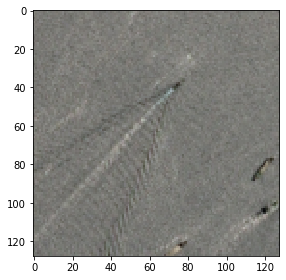

In [11]:
io.imshow(imagesList[1])

In [ ]:
imagesEdges = []
for i in smoothenedImages:
    edgesResult = filters.sobel(i)
    imagesEdges.append(edgesResult)
    io.imsave("smoothened/{}".format(trainImages[count]), edgesResult)
    count+=1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [ ]:
io.imshow(imagesEdges[1])